In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import numpy as np
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots
import pickle
from mcu_chamfer import MCUChamferModel


In [48]:
figure_num = 20**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
lw = np.array([0, -75])
up = np.array([20, 75])
fixed_params = {"height": 100}
seed = 123
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up, seed=seed)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUChamferModel(k=10, c=0.1, figures=figures, params=control_vars, params_names=param_names)

In [49]:
mcu_model.train(max_iters=100, do_cliques=False, keep_mutual_only=True)


                                     CVXPY                                     
                                     v1.4.1                                    
(CVXPY) May 07 01:01:56 AM: Your problem has 160000 variables, 3726 constraints, and 0 parameters.
(CVXPY) May 07 01:01:57 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 07 01:01:57 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 07 01:01:57 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) May 07 01:01:57 AM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 07 01:01:57 AM: Compiling problem (target solver=SCS)

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [50]:
t=3
ind = np.argsort(mcu_model.dists[t])
mcu_model.dists[t, ind]

array([0.        , 0.02023728, 0.02159292, 0.02318837, 0.03146614,
       0.04667041, 0.04717747, 0.04771461, 0.0494848 , 0.05459576,
       0.05744342, 0.06156282, 0.0640008 , 0.06655736, 0.06662026,
       0.0675066 , 0.06876363, 0.07050092, 0.07156848, 0.0728923 ,
       0.07790489, 0.08143898, 0.08264082, 0.08435845, 0.08477087,
       0.0859923 , 0.09102707, 0.09201605, 0.09298688, 0.09724417,
       0.09782949, 0.09895722, 0.10292419, 0.10366329, 0.10411498,
       0.105481  , 0.10710047, 0.11109472, 0.11167544, 0.11196811,
       0.11349035, 0.11376886, 0.11649984, 0.11712696, 0.119428  ,
       0.12058993, 0.12068711, 0.12161628, 0.12345827, 0.12394597,
       0.12528647, 0.12797186, 0.12806303, 0.12830279, 0.13090165,
       0.13169602, 0.13202933, 0.1322839 , 0.13462054, 0.13481945,
       0.13499287, 0.13563197, 0.1368955 , 0.13730494, 0.13793045,
       0.13827356, 0.13872253, 0.13938377, 0.14201841, 0.14250496,
       0.14284189, 0.14303216, 0.14441986, 0.14467166, 0.14625

[0.0302261  0.03300005 0.03533039 0.0360029  0.03667499]
-0.582056339480097 20.241551044841852 -74.81833801097417 76.99270594646364


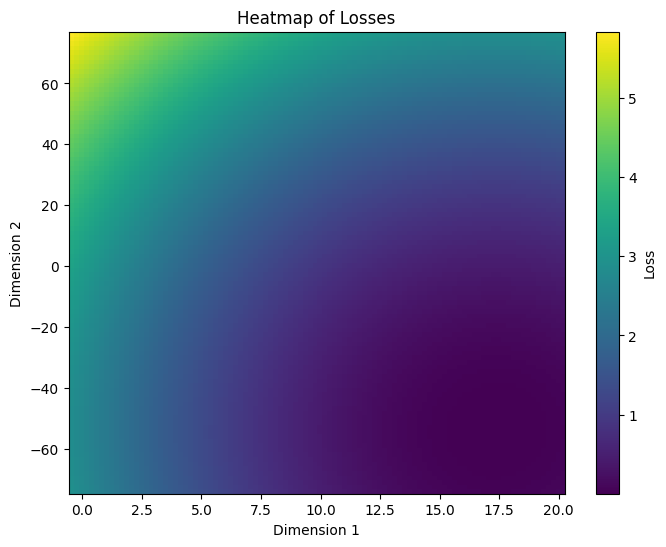

Finding neighbors: 98 ms , optimization: 189 ms
x_opt = [ 17.67265438 -57.05701349], x_err = 0.00016984137305716508
x_real = [ 18.26632303 -55.30949168]


In [51]:
test_control_vars = np.array([[18.26632303, -55.30949168]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, cyl_generator.generate_cylinder_points,
                                                           noise_level=noise_level,
                                                           min_num_points=200)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True, k=5)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")

In [52]:
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")
print(f"Average number of neighbors: {mcu_model.avg_k}")
prob = mcu_model.prob
constraint_residuals = [(constraint, constraint.residual) for constraint in prob.constraints]
constraint_residuals.sort(key=lambda x: abs(x[1]), reverse=True)
for i, (constraint, residual) in enumerate(constraint_residuals[:5], 1):
    print(f"{i}. Constraint: {constraint}")
    print(f"   Residual: {residual}")

rre_median_embedding_vs_params: 0.00038325817087870705
Average number of neighbors: 9.31
1. Constraint: trace(var152738) <= 39.900000000000006
   Residual: 5.272541386456098
2. Constraint: trace([[1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]
 ...
 [1.00 1.00 ... 1.00 1.00]
 [1.00 1.00 ... 1.00 1.00]] @ var152738) == 0.0
   Residual: 0.0003731331233642887
3. Constraint: var152738[163, 0:400][163] + var152738[177, 0:400][177] + -2.0 @ var152738[163, 0:400][177] == 0.011802644257984666
   Residual: 0.0001470605736534937
4. Constraint: var152738[177, 0:400][177] + var152738[163, 0:400][163] + -2.0 @ var152738[177, 0:400][163] == 0.011802644257984666
   Residual: 0.0001470605736534937
5. Constraint: var152738[267, 0:400][267] + var152738[275, 0:400][275] + -2.0 @ var152738[267, 0:400][275] == 0.041739133749566656
   Residual: 0.00010173388866074884


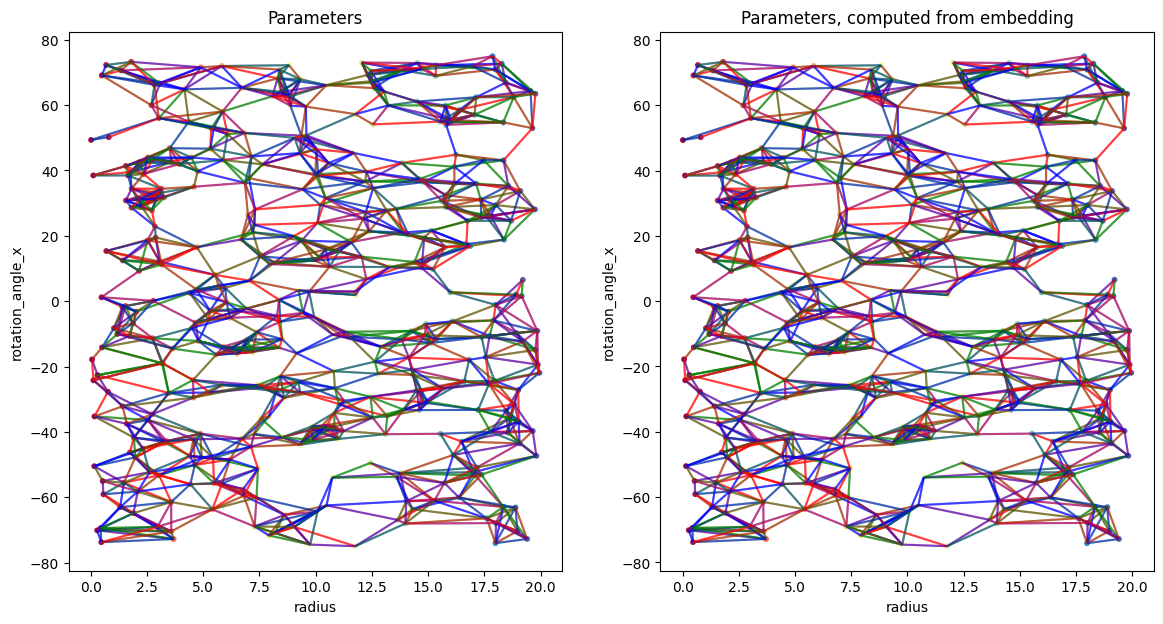

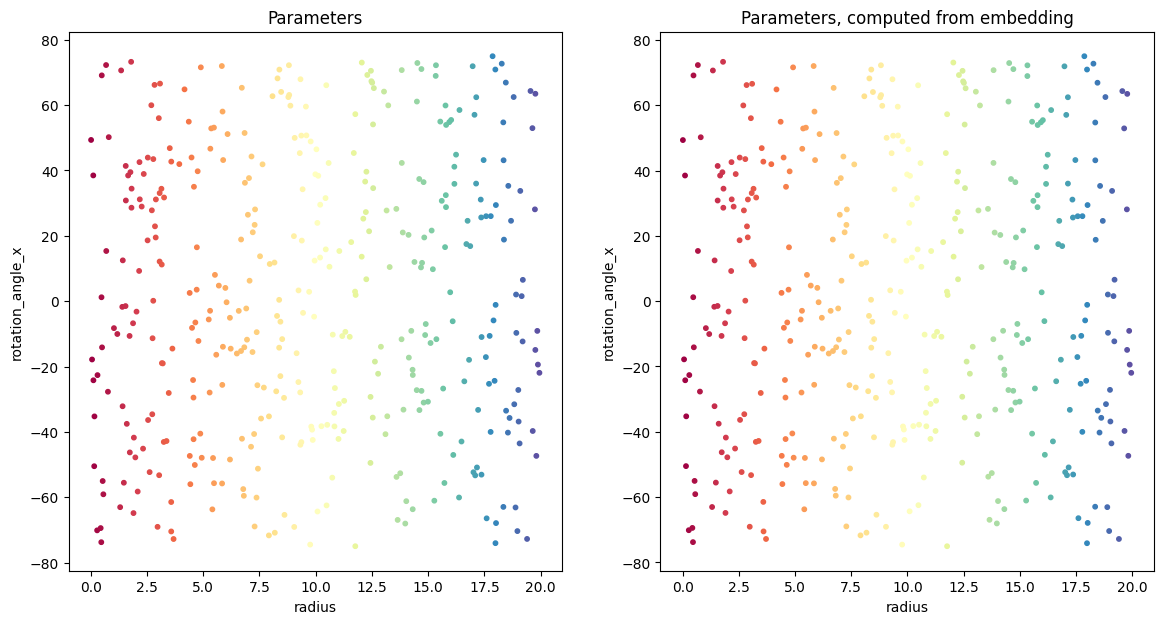

In [53]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [54]:
mcu_experiments = MCUexperiments(mcu_model)
k=10
pieces = 8
test_size = 50
seed = 153
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt=200, k=k, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed=seed)

[0.01602179 0.02123185 0.02455043 0.02575741 0.02672253 0.02728971
 0.02934186 0.03207988 0.03568815 0.0357778 ]
Finding neighbors: 148 ms , optimization: 1 ms
-----------
x_opt  = [  2.86245692 -62.70962922], x_err = 0.009218480629229649
x_real = [  2.33794694 -64.79909116]
[0.01439079 0.01642979 0.01836415 0.01857823 0.01954637 0.02541347
 0.02702644 0.03098978 0.03103426 0.03450911]
Finding neighbors: 108 ms , optimization: 0 ms
-----------
x_opt  = [  1.9456801  -59.42944302], x_err = 0.014781485947981428
x_real = [  0.27745319 -58.93880482]
[0.01681602 0.01713453 0.01790106 0.02050944 0.02241241 0.02537048
 0.02617797 0.02673886 0.02998087 0.03234228]
Finding neighbors: 113 ms , optimization: 1 ms
-----------
x_opt  = [  1.71399927 -57.19041834], x_err = 0.010625906801751683
x_real = [  0.95539304 -57.18930132]
[0.01513507 0.02079864 0.02256044 0.02445842 0.02680608 0.02688025
 0.0282644  0.03041916 0.03138193 0.03174295]
Finding neighbors: 109 ms , optimization: 0 ms
-----------


In [8]:
interval_runs_base, intervals_base = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt=200, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, baseline=True, seed = seed)

-----------
x_opt  = [  1.90565586 -64.83420825], x_err = 0.006388680193120595
x_real = [  2.33794694 -64.79909116]
-----------
x_opt  = [  0.56607632 -59.08533938], x_err = 0.017271228229319067
x_real = [  0.27745319 -58.93880482]
-----------
x_opt  = [  1.47683683 -55.54243535], x_err = 0.0036675970068003718
x_real = [  0.95539304 -57.18930132]
-----------
x_opt  = [  1.31277633 -63.02789714], x_err = 0.0035853417539108133
x_real = [  0.96387678 -64.10328594]
-----------
x_opt  = [  2.97511624 -69.04100778], x_err = 0.007088070252445894
x_real = [  2.30103864 -74.84619902]
-----------
x_opt  = [  2.97511624 -69.04100778], x_err = 0.004421265526635956
x_real = [  2.43168351 -70.62135017]
-----------
x_opt  = [  0.56607632 -59.08533938], x_err = 0.017805703872719285
x_real = [  0.19915144 -59.25586866]
-----------
x_opt  = [  0.56607632 -59.08533938], x_err = 0.018399742542028065
x_real = [  0.948107   -59.20383326]
-----------
x_opt  = [  0.47375973 -73.74253392], x_err = 0.0468698225

In [ ]:
interval_runs_sym_base, intervals_sym_base = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt=200, k=4, noise_level=0, pieces_cnt=pieces, test_data_size=test_size, same_value=False, seed=seed, baseline=True, symmetric=True)

In [45]:
data = {
    'interval_runs': interval_runs,
    # 'interval_runs_sym': interval_runs_sym,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base,
    'model': mcu_model
}
with open('tmp_storage/ch_cyl.pkl', 'wb') as f:
    pickle.dump(data, f)


In [63]:
with open('tmp_storage/orig_cyl.pkl', 'rb') as f:
    orig_data = pickle.load(f)


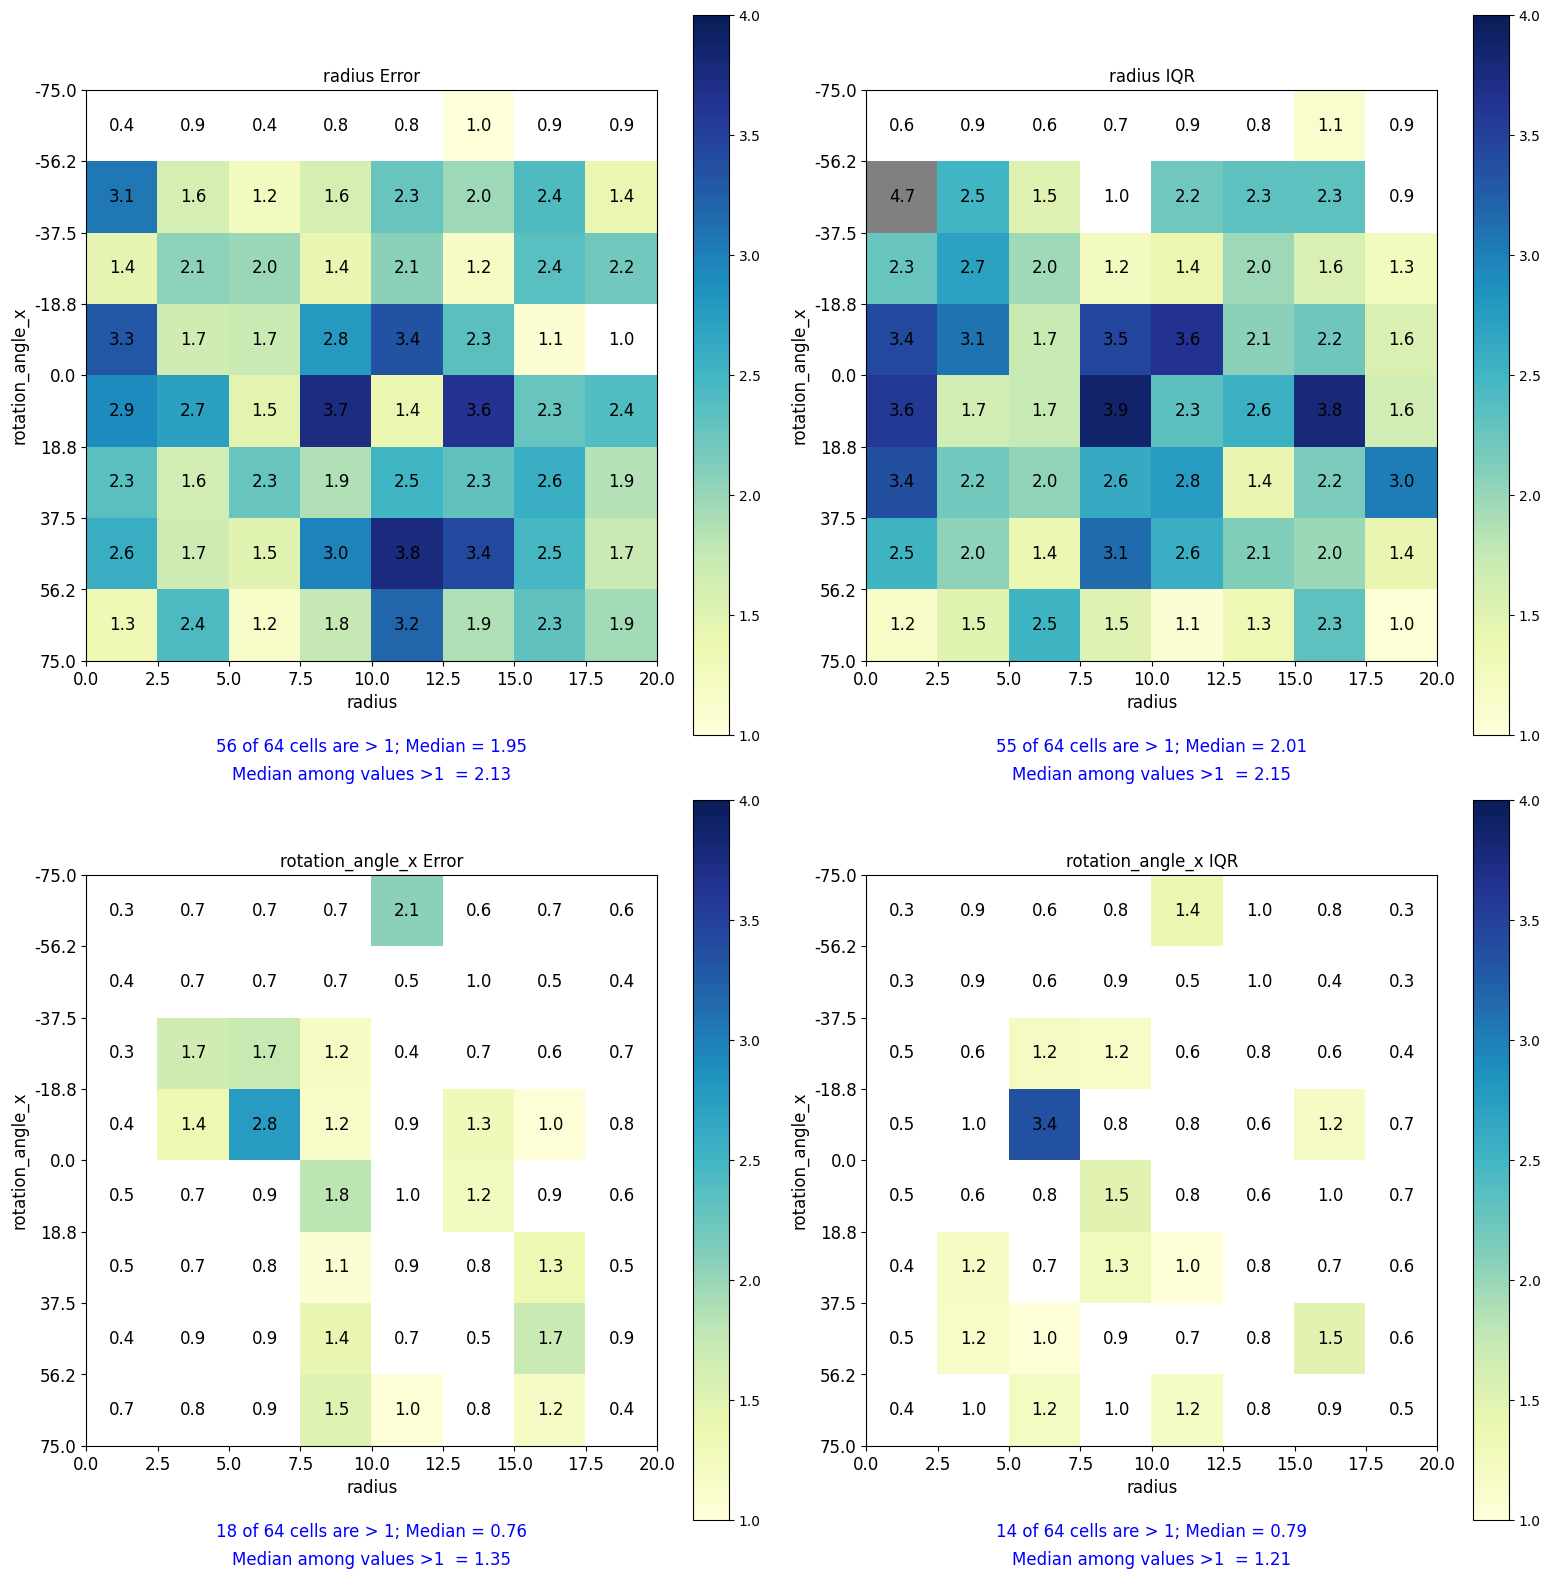

In [70]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, orig_data['interval_runs'] / interval_runs, title="", lw=1, up=4, count_greater_than=1)

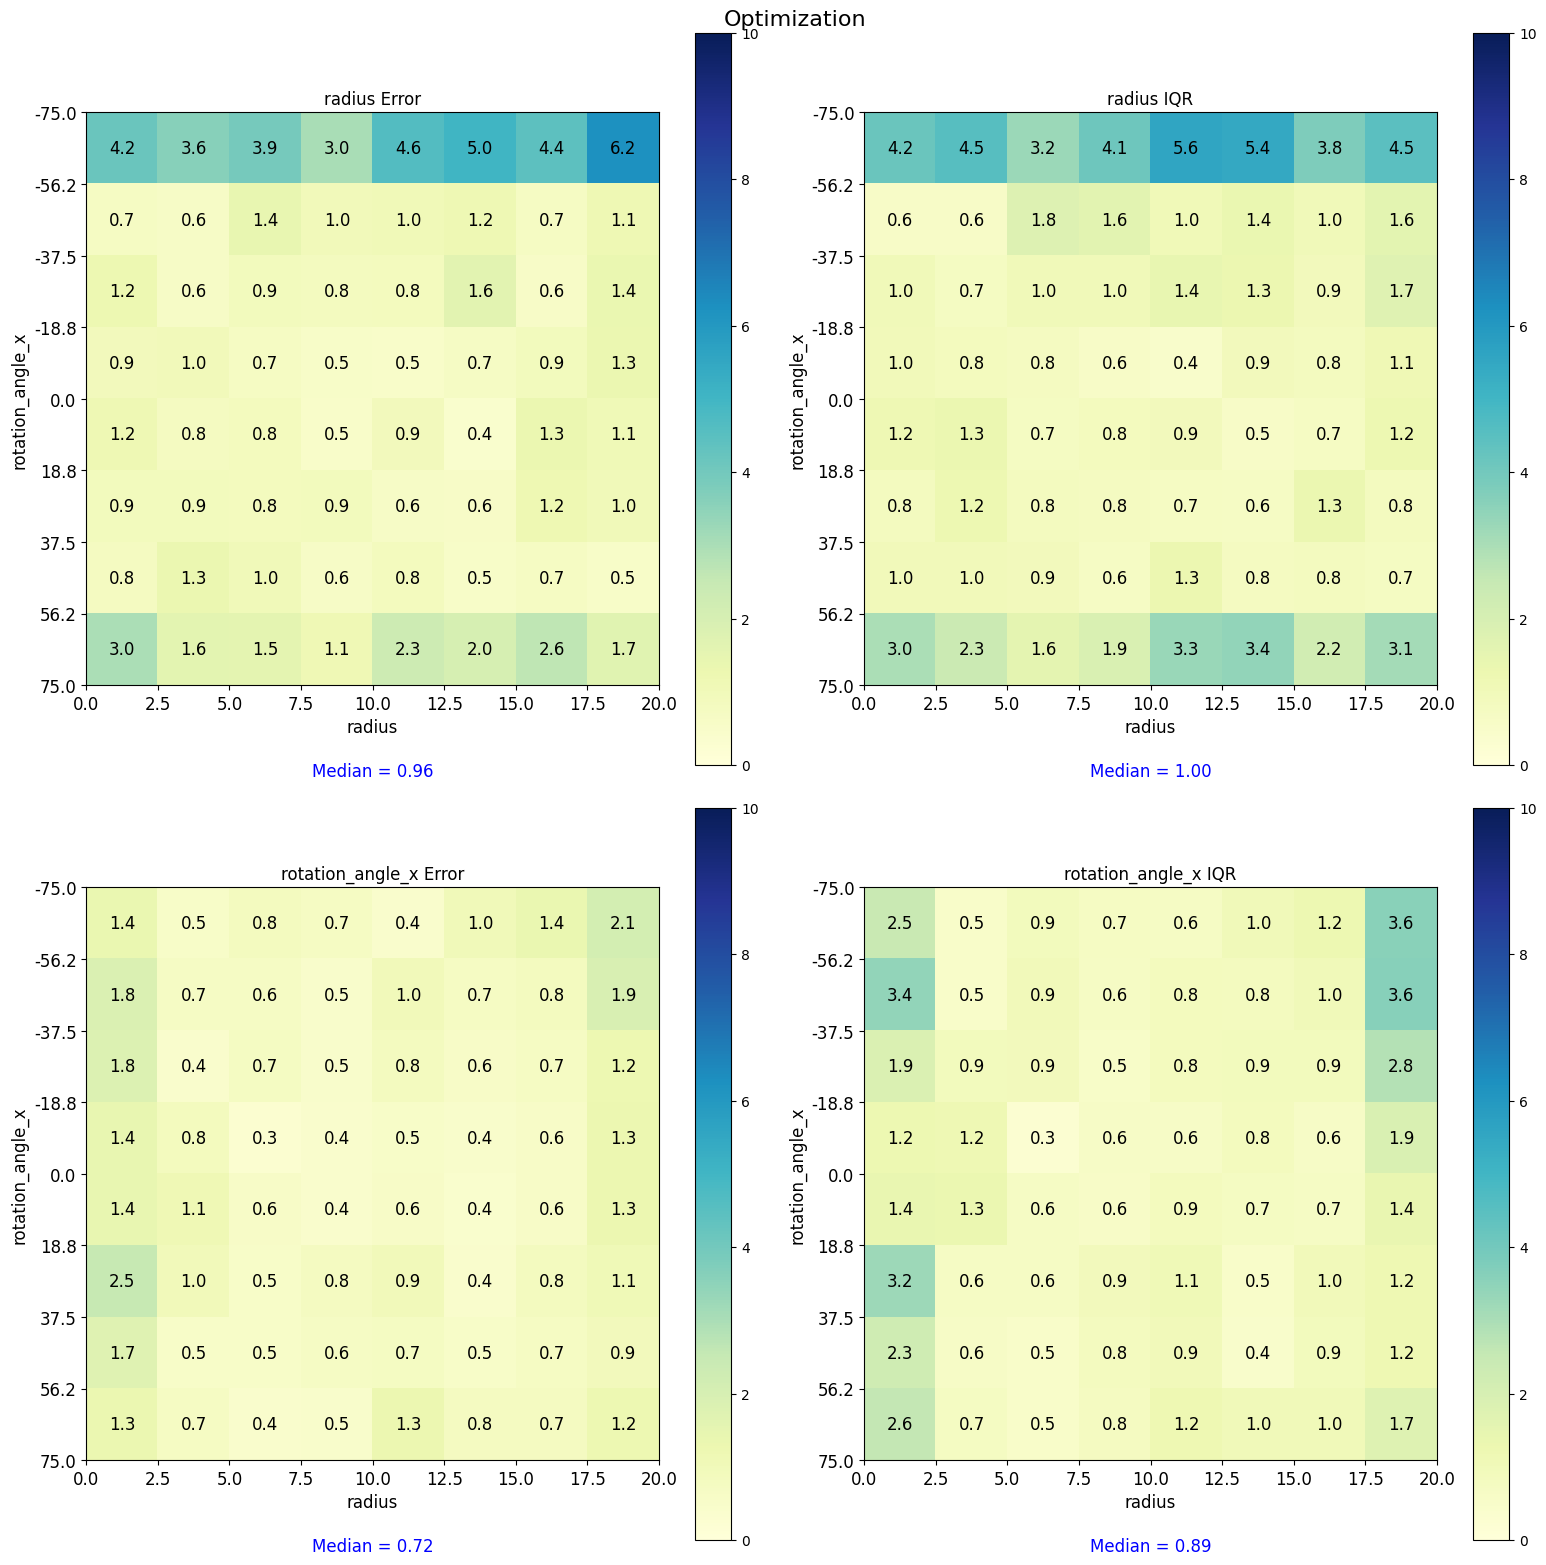

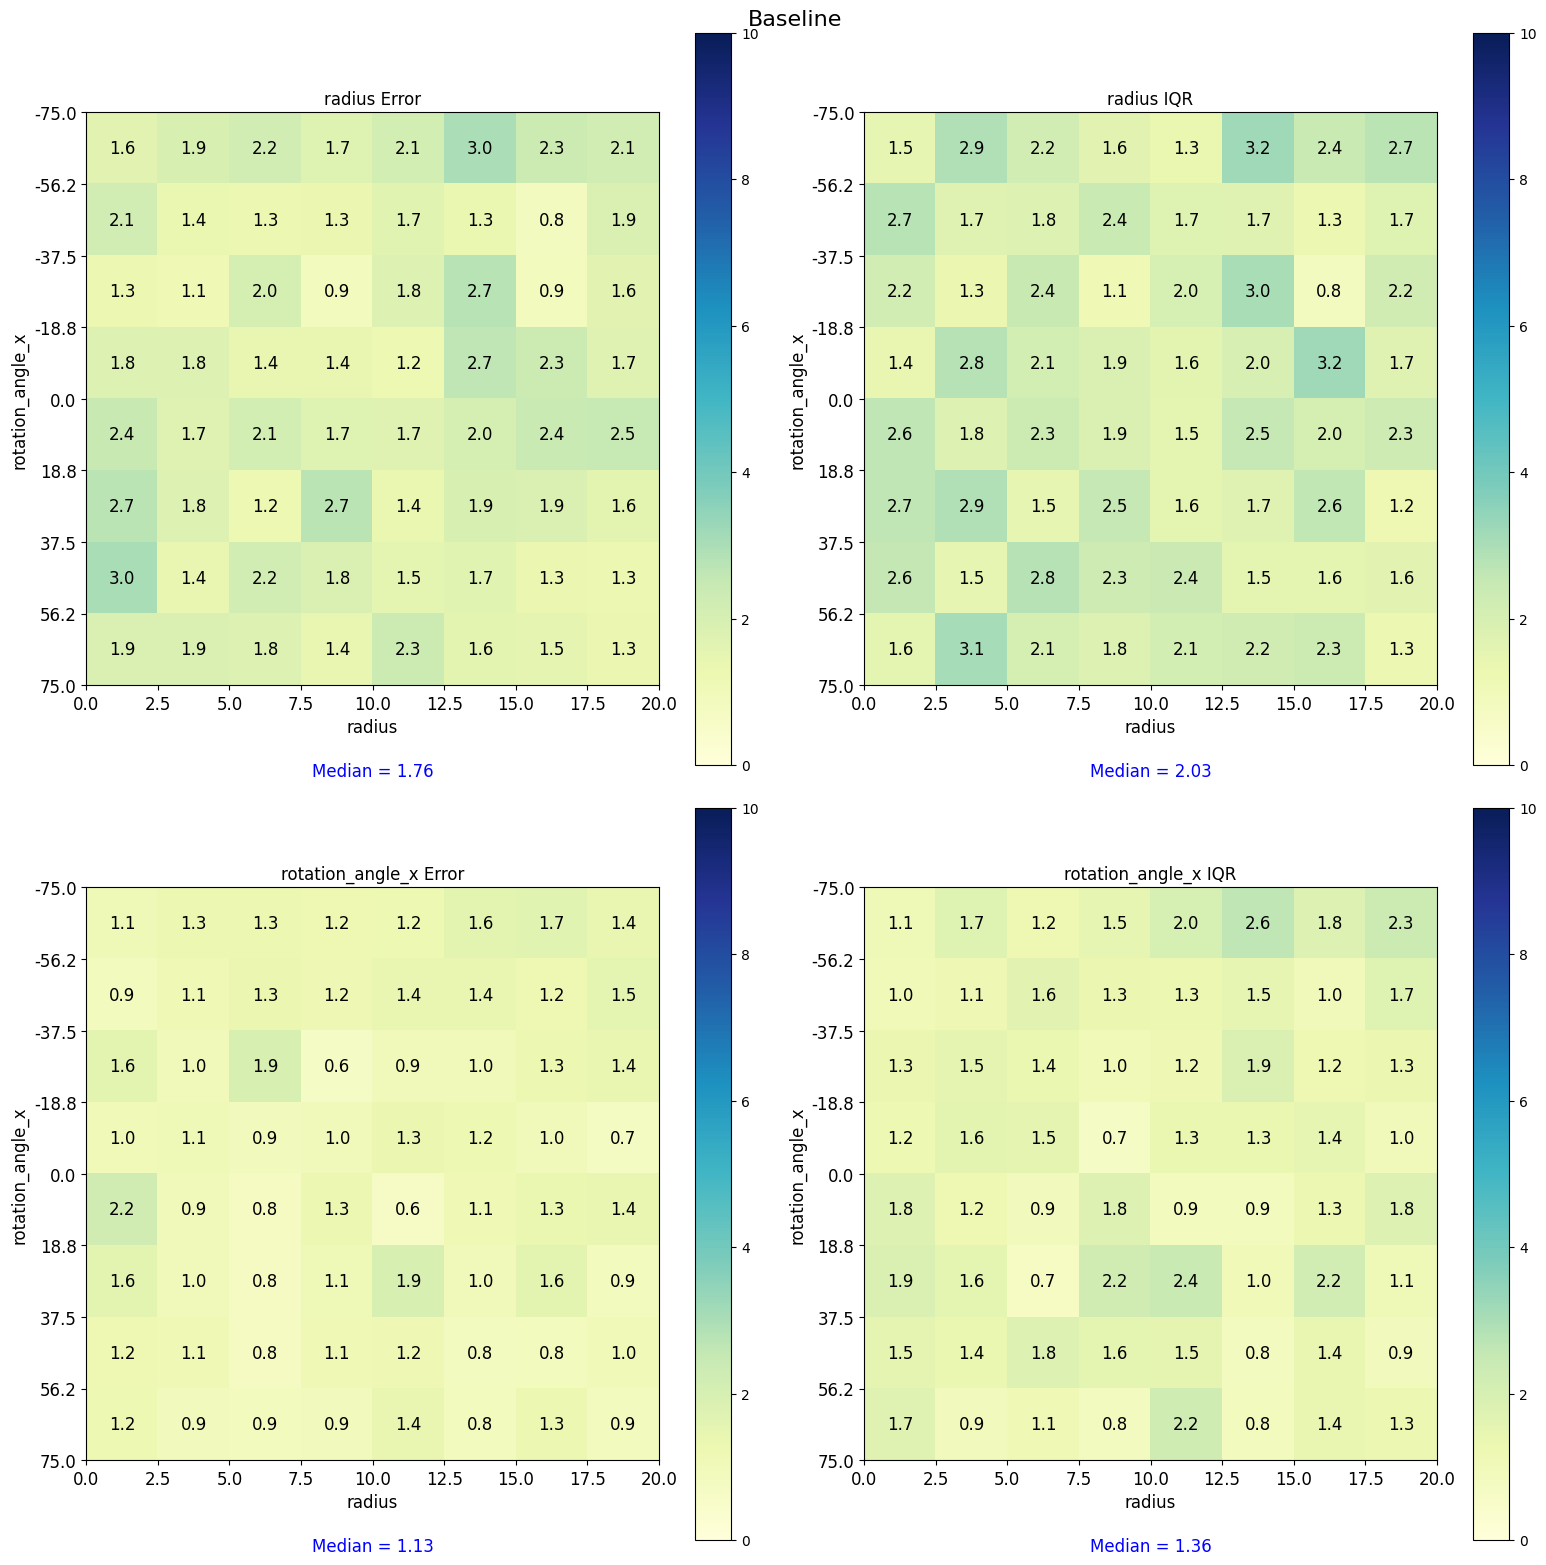

In [71]:
heatmap_lw=0
hetmap_up=10
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, title="Optimization", lw=heatmap_lw, up=hetmap_up)
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals_base, interval_runs_base, title="Baseline", lw=heatmap_lw, up=hetmap_up)

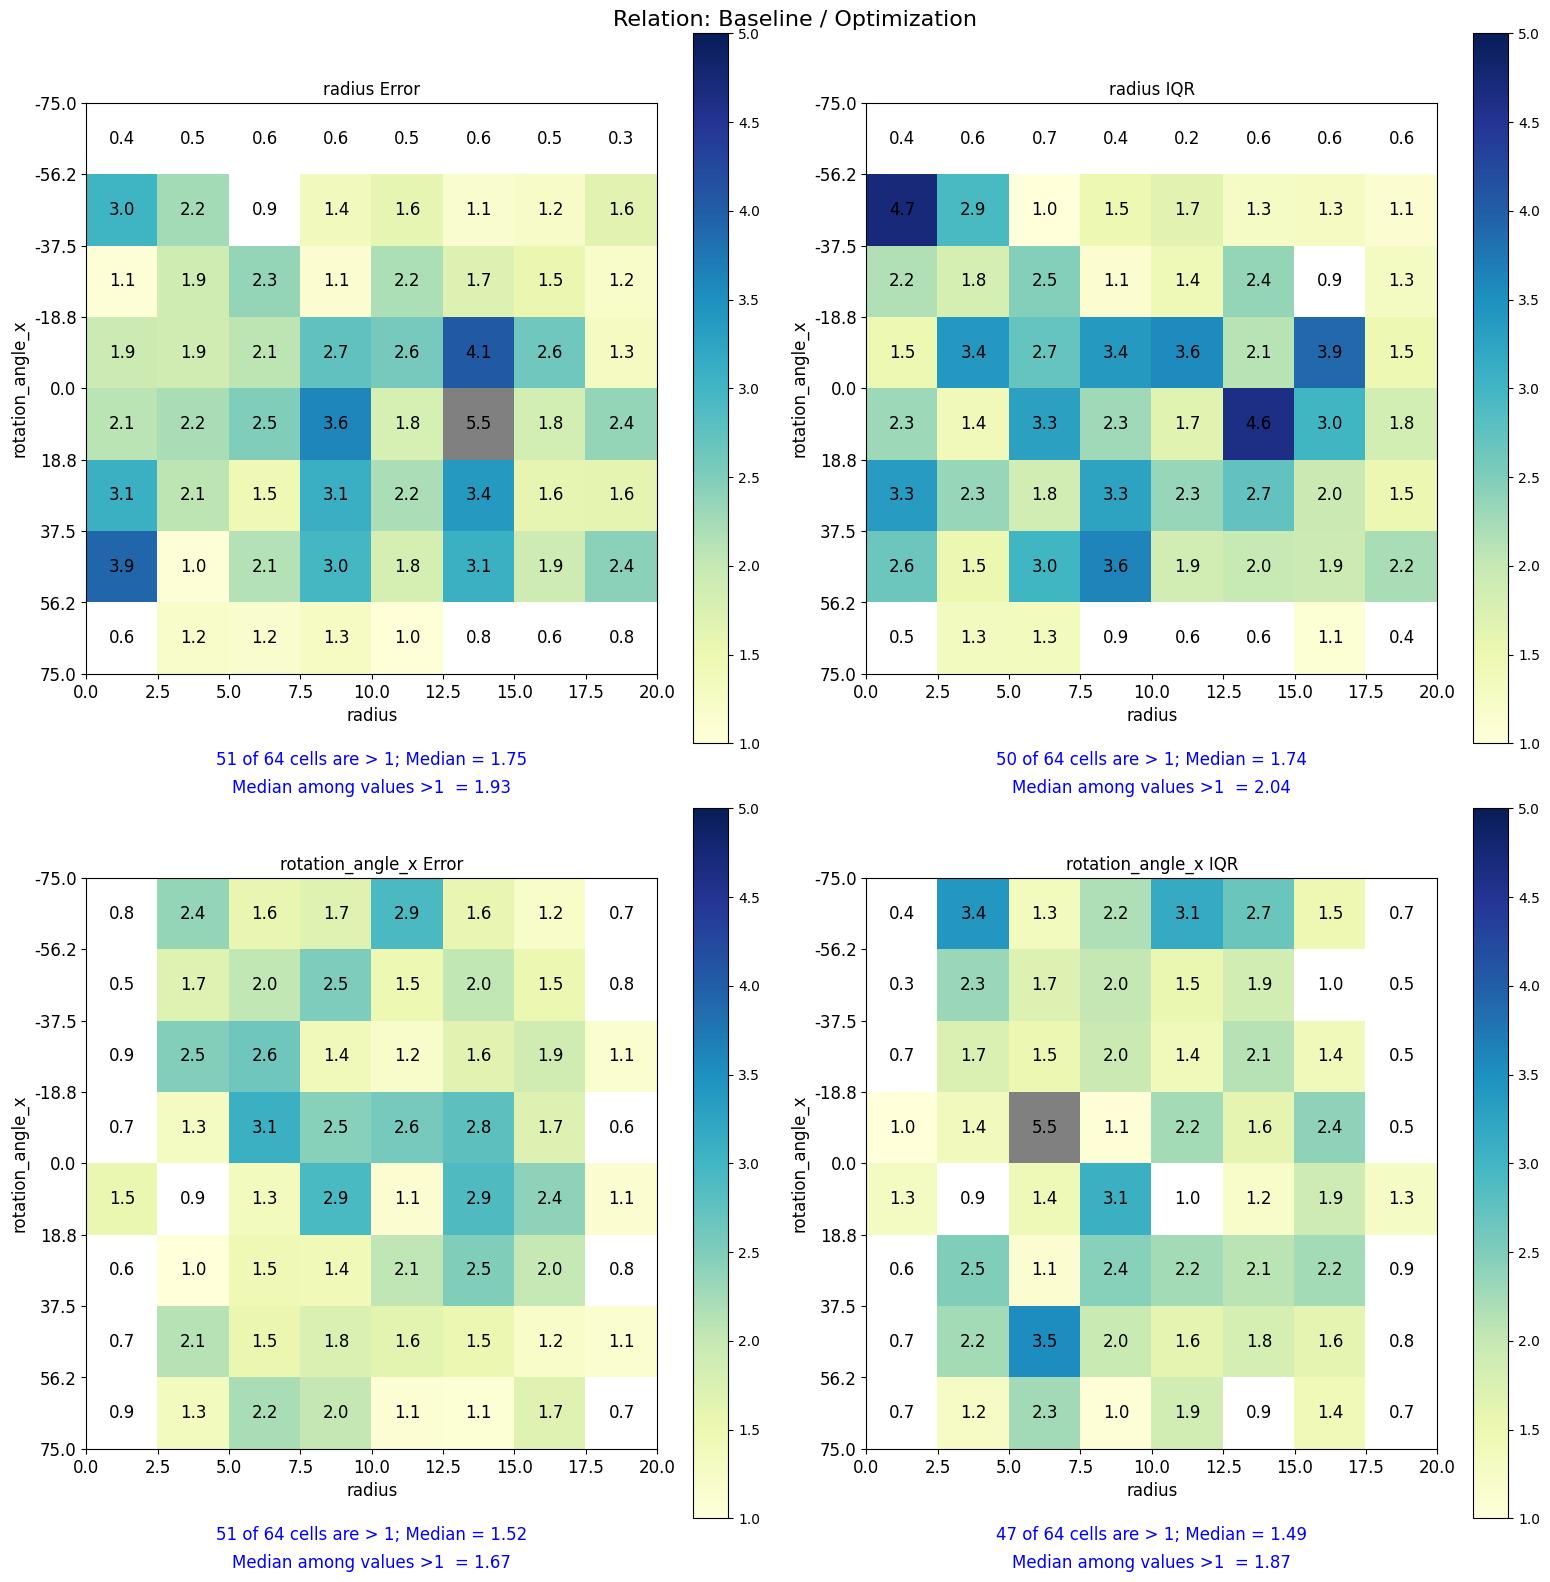

In [62]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs_base / interval_runs, filename = f"images/ch_cyl_2d_rel.png", title="Relation: Baseline / Optimization", lw=1, up=5, count_greater_than=1)

In [19]:
mcu_model.B

array([[-0.17924269,  0.17869208],
       [-0.17875364, -0.17914017]])

In [12]:
data = {
    'interval_runs': interval_runs,
    'intervals': intervals,
    'interval_runs_base': interval_runs_base,
    'model': mcu_model
}
with open('tmp_storage/ch_cyl.pkl', 'wb') as f:
    pickle.dump(data, f)